In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
infiles = {
    'ACCESS-CM2': 'example_data/wsdi_yr_ACCESS-CM2_ssp370_ensemble_aus-states-cities_1850-2100.csv',
    'MPI-ESM1-2-LR' : 'example_data/wsdi_yr_MPI-ESM1-2-LR_ssp370_ensemble_aus-states-cities_1850-2100.csv',
}

In [8]:
df_dict = {}
df_dict['ACCESS-CM2'] = pd.read_csv(infiles['ACCESS-CM2'])
df_dict['MPI-ESM1-2-LR'] = pd.read_csv(infiles['MPI-ESM1-2-LR'])

In [9]:
df_dict['ACCESS-CM2']

,year,model,run,experiment,NSW,VIC,QLD,SA,WA,TAS,NT,AUS,Melbourne,Sydney,Brisbane,Darwin,Perth,Adelaide,Hobart
0,1850,ACCESS-CM2,r10i1p1f1,historical,4.41,1.84,4.96,3.53,3.07,0.00,4.62,3.90,0.0,0.0,0.0,0.0,6.0,0.0,0.0
1,1850,ACCESS-CM2,r1i1p1f1,historical,12.43,2.15,12.32,7.01,11.99,0.00,10.02,10.73,0.0,13.0,12.0,0.0,6.0,0.0,0.0
2,1850,ACCESS-CM2,r2i1p1f1,historical,7.09,6.50,4.51,4.15,8.09,2.93,3.65,5.80,7.0,6.0,6.0,0.0,0.0,6.0,0.0
3,1850,ACCESS-CM2,r3i1p1f1,historical,1.78,0.00,1.34,0.40,0.12,0.00,1.73,0.88,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1850,ACCESS-CM2,r4i1p1f1,historical,1.61,0.00,0.30,1.03,2.74,0.00,2.50,1.71,0.0,0.0,0.0,6.0,6.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2505,2100,ACCESS-CM2,r5i1p1f1,ssp370,190.16,121.94,299.58,120.60,215.32,241.14,287.31,229.66,155.0,172.0,306.0,365.0,191.0,86.0,177.0
2506,2100,ACCESS-CM2,r6i1p1f1,ssp370,95.36,117.60,215.49,80.81,176.21,210.63,226.79,171.86,139.0,155.0,227.0,365.0,248.0,73.0,177.0
2507,2100,ACCESS-CM2,r7i1p1f1,ssp370,159.83,127.78,256.40,109.88,180.82,275.71,251.72,198.28,168.0,146.0,259.0,365.0,217.0,98.0,262.0
2508,2100,ACCESS-CM2,r8i1p1f1,ssp370,153.68,135.99,243.92,105.70,203.54,244.31,237.31,199.20,161.0,195.0,284.0,363.0,222.0,101.0,208.0


In [10]:
def plot_location(model, location, start_year=1950):
    """Scatterplot for a given location"""

    df = df_dict[model]
    fig, ax = plt.subplots(figsize=[15,7])
    sns.scatterplot(
        ax=ax,
        data=df[df['year'] >= start_year],
        x='year',
        y=location,
        hue='run',
    )
    ax.set_ylabel('WSDI')
    ax.set_title(f'{model} - {location}')
    ax.grid()
    plt.show()

In [11]:
def plot_dist(model, location, start_year=1950, end_year=2014):
    """Histogram for a given location"""

    df = df_dict[model]
    df_ref = df[(df['year'] >= start_year) & (df['year'] <= end_year)]
    fig, ax = plt.subplots()
    sns.histplot(
        ax=ax,
        data=df_ref,
        x=location,
    )
    ax.set_ylabel('WSDI')
    ax.set_title(f'{model} - {location}')
    ax.grid()
    plt.show()

In [19]:
def plot_odds(
    model,
    location,
    ref_start=1950,
    ref_end=2014,
    runs_subsets=[],
):
    """Odds of a year higher than a given quantile for a given location."""

    fig, ax = plt.subplots()
    
    df = df_dict[model]
    runs_list = df['run'].unique()
    runs_subsets.append(len(runs_list))
    for nruns in runs_subsets:
        runs = runs_list[0:nruns]
        df = df_dict[model]
        df = df[df['run'].isin(runs)]
        df_ref = df[(df['year'] >= ref_start) & (df['year'] <= ref_end)]
        p98 = df_ref[location].quantile(0.98)
        print(f'98th percentile = {p98} ({ref_start}-{ref_end}; {nruns} runs)') 
        window = nruns * 20
        odds = df[location].rolling(window, step=nruns, center=True).apply(lambda s: (sum(s > p98) / window) * 100)
        odds.index = df['year'].unique()
        odds = odds.dropna()
        sns.lineplot(
            ax=ax,
            data=odds,
            label=f'{nruns} runs',
        )
    ax.set_xlabel('year')
    ax.set_ylabel('odds of exceeding 1-in-50 year event (%)') 
    ax.set_title(f'WSDI - {model} - {location}')
    ax.grid()
    plt.show()

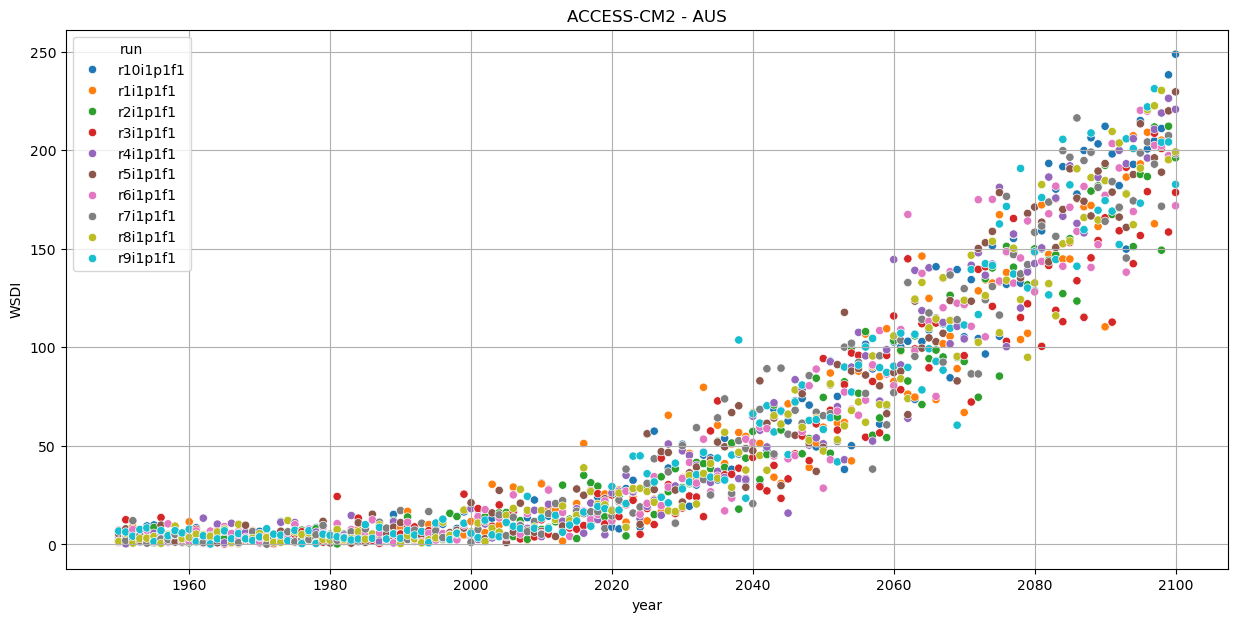

In [13]:
plot_location('ACCESS-CM2', 'AUS')

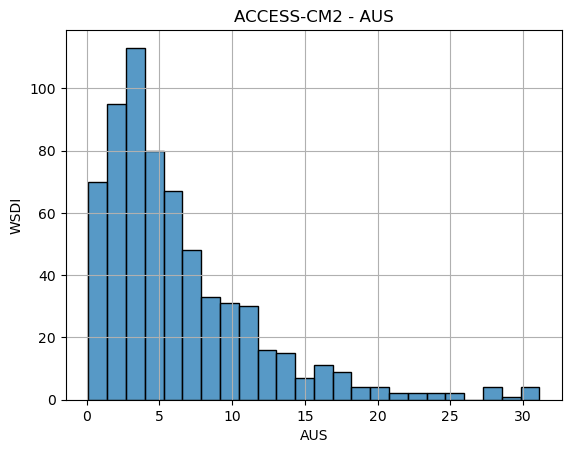

In [17]:
plot_dist('ACCESS-CM2', 'AUS')

98th percentile = 21.192399999999996 (1950-2014; 1 runs)
98th percentile = 22.605599999999967 (1950-2014; 10 runs)


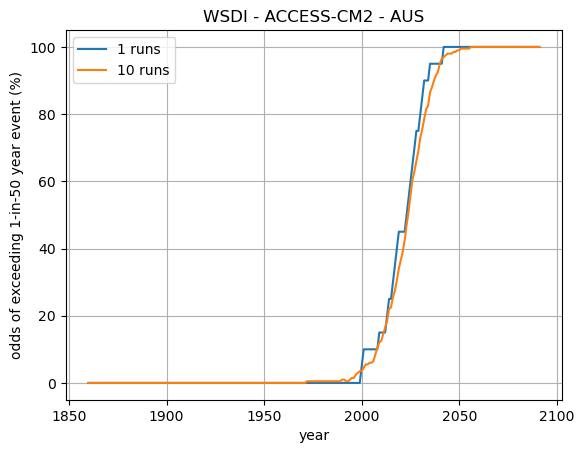

In [21]:
plot_odds('ACCESS-CM2', 'AUS', runs_subsets=[1,])

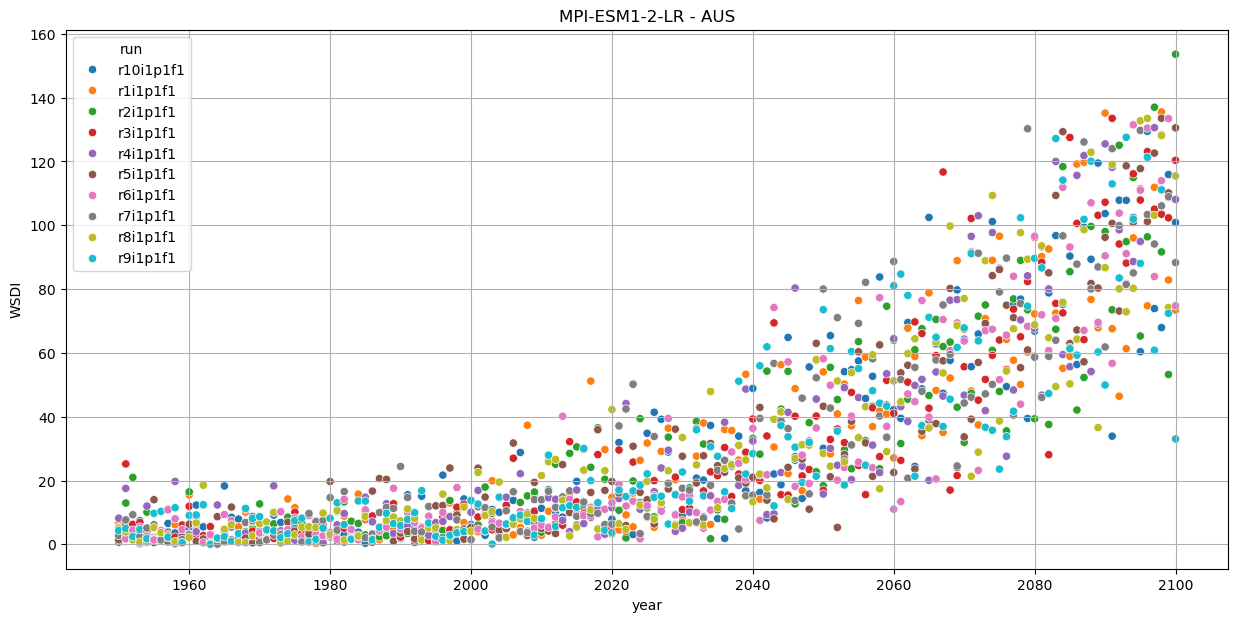

In [22]:
plot_location('MPI-ESM1-2-LR', 'AUS')

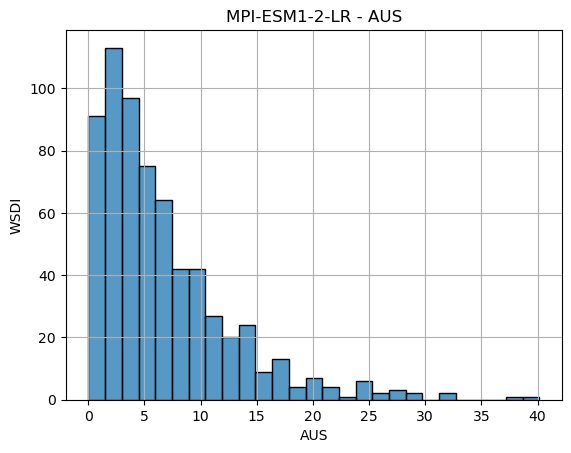

In [23]:
plot_dist('MPI-ESM1-2-LR', 'AUS')

98th percentile = 20.747999999999998 (1950-2014; 1 runs)
98th percentile = 24.982799999999997 (1950-2014; 10 runs)


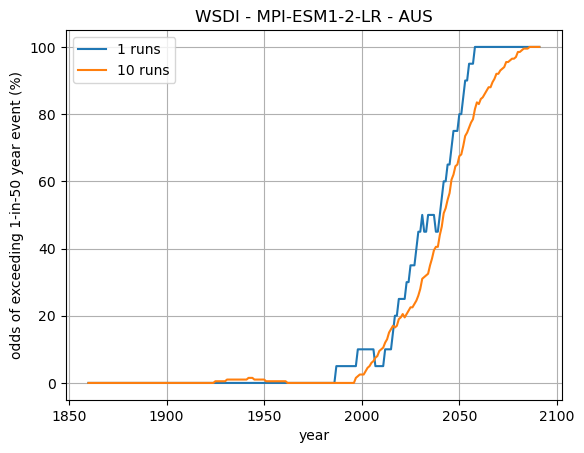

In [24]:
plot_odds('MPI-ESM1-2-LR', 'AUS', runs_subsets=[1,])